In [5]:
import zipfile
from google.colab import files

In [6]:
with zipfile.ZipFile("archive.zip") as zip_ref:
  zip_ref.extractall(".")

In [7]:
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
from glob import glob
import matplotlib.pyplot as plt


In [9]:
IMAGE_SIZE = [224,224]
data_path = "/content/facemask-dataset/dataset"

In [10]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)
for layer in vgg.layers:
  layer.trainable = False



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
folders = glob(data_path + '/*')

x = Flatten()(vgg.output)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(len(folders),activation='softmax')(x)


model = Model(inputs = vgg.input,outputs = prediction)


In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
model.compile(optimizer= 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [14]:
datagen = ImageDataGenerator(
    rescale = 1/255.0,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

In [15]:
train_set = datagen.flow_from_directory(data_path,
                                        target_size = (224,224),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        subset = "training")

Found 3067 images belonging to 2 classes.


In [16]:
val_set = datagen.flow_from_directory(data_path,
                                        target_size = (224,224),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        subset ="validation")

Found 766 images belonging to 2 classes.


In [17]:
r = model.fit(
    train_set,
    validation_data=val_set,
    epochs=5,
    steps_per_epoch=len(train_set),
    validation_steps=len(val_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
67/96 ━━━━━━━━━━━━━━━━━━━━ 17s 587ms/step - accuracy: 0.7790 - loss: 0.7826

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 91s 796ms/step - accuracy: 0.8135 - loss: 0.6460 - val_accuracy: 0.9830 - val_loss: 0.0621
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 103s 528ms/step - accuracy: 0.9629 - loss: 0.0933 - val_accuracy: 0.9843 - val_loss: 0.0563
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 535ms/step - accuracy: 0.9604 - loss: 0.1051 - val_accuracy: 0.9752 - val_loss: 0.0713
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 535ms/step - accuracy: 0.9801 - loss: 0.0571 - val_accuracy: 0.9896 - val_loss: 0.0430
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 632ms/step - accuracy: 0.9820 - loss: 0.0571 - val_accuracy: 0.9896 - val_loss: 0.0312


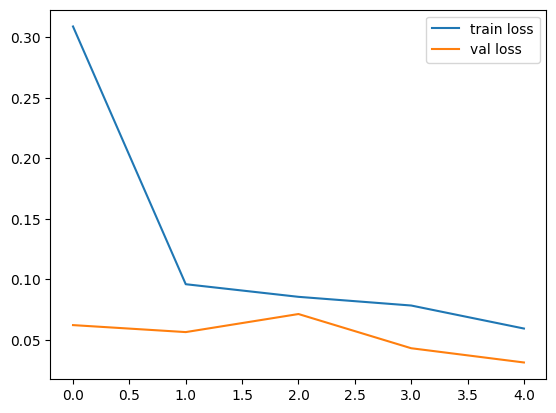

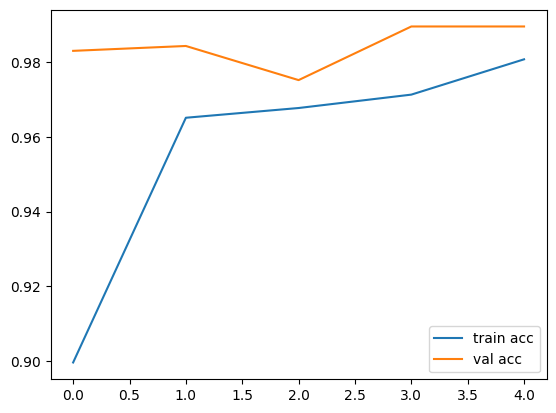

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Save model
model.save("mask_detector_vgg16.h5")